# Imports and Setup

In [48]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import trimesh
import json
import os
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Loading and Preprocessing

In [47]:
def normalize_point_cloud(points):
    centroid = np.mean(points, axis=0)
    points -= centroid
    max_distance = np.max(np.linalg.norm(points, axis=1))
    points /= max_distance
    return points

def process_file(obj_file, json_file, output_dir):
    # Load the point cloud
    mesh = trimesh.load(obj_file)
    points = mesh.vertices
    
    # Normalize the point cloud
    points = normalize_point_cloud(points)
    
    # Save the point cloud
    np.save(os.path.join(output_dir, 'point_cloud.npy'), points)
    
    # Load JSON data
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    labels = np.array(data['labels'])
    instances = np.array(data['instances'])
    
    # Save labels and instances
    np.save(os.path.join(output_dir, 'labels.npy'), labels)
    np.save(os.path.join(output_dir, 'instances.npy'), instances)

def process_directory(base_dir):
    for jaw in ['upper', 'lower']:
        for person_dir in os.listdir(os.path.join(base_dir, jaw)):
            person_path = os.path.join(base_dir, jaw, person_dir)
            obj_file = os.path.join(person_path, f"{person_dir}_{jaw}.obj")
            json_file = os.path.join(person_path, f"{person_dir}_{jaw}.json")
            output_dir = os.path.join('processed_data', jaw, person_dir)
            os.makedirs(output_dir, exist_ok=True)
            process_file(obj_file, json_file, output_dir)

#if __name__ == "__main__":
 #   base_dir = '3Dteeths_segmentation_data_part_1'
  #  process_directory(base_dir)


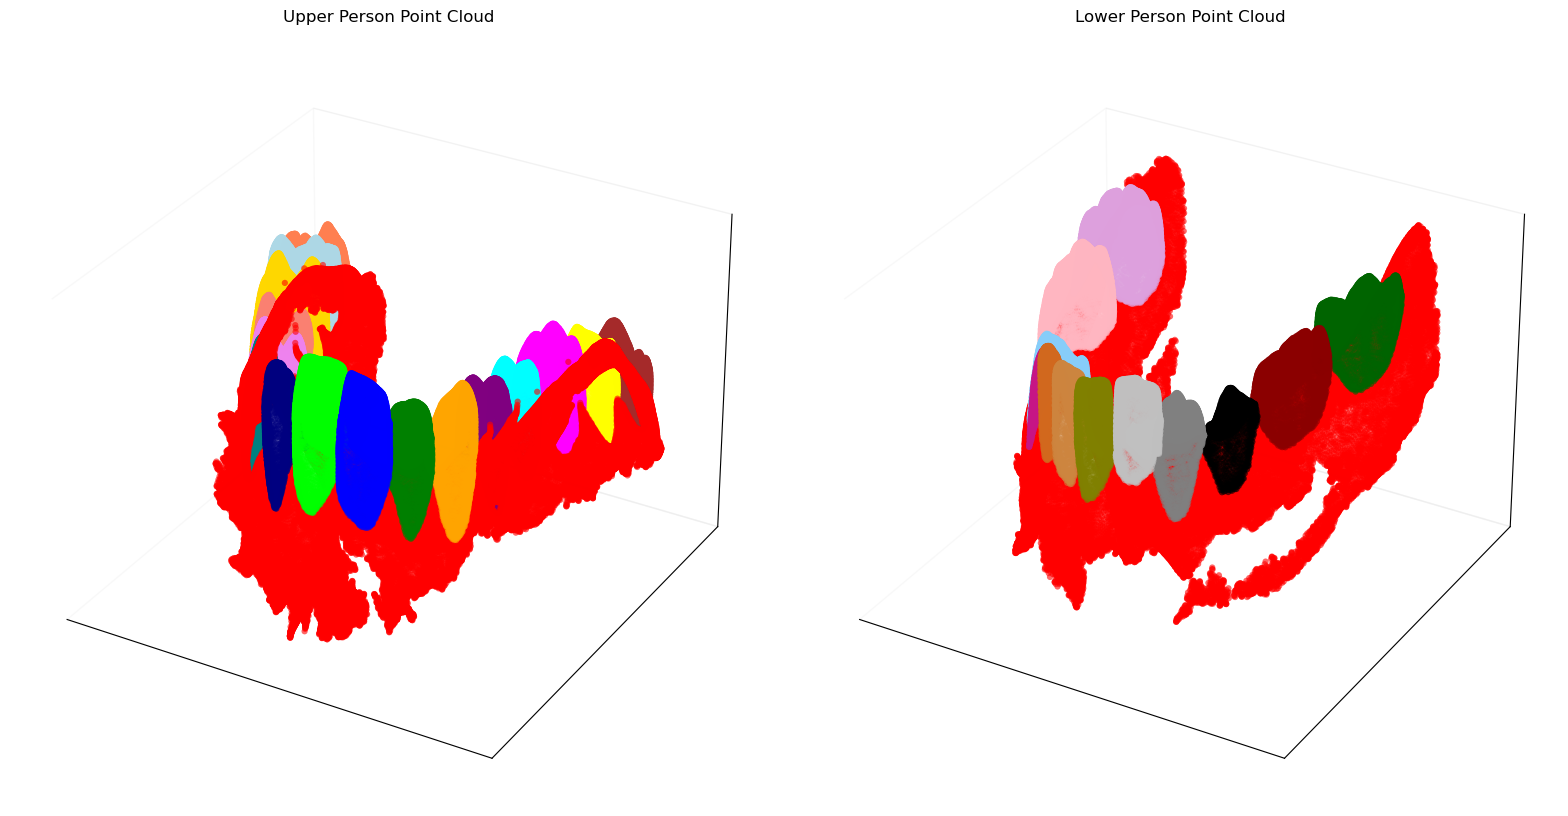

In [26]:
data_path = 'processed_data'
upper_folder = os.path.join(data_path, 'upper')
lower_folder = os.path.join(data_path, 'lower')

# Function to get a random person folder
def get_random_person(folder):
    persons = os.listdir(folder)
    selected_person = random.choice(persons)
    return os.path.join(folder, selected_person)

# Function to load a point cloud and its labels
def load_point_cloud_and_labels(person_path):
    point_cloud_file = os.path.join(person_path, 'point_cloud.npy')
    labels_file = os.path.join(person_path, 'labels.npy')

    if os.path.exists(point_cloud_file) and os.path.exists(labels_file):
        points = np.load(point_cloud_file)
        labels = np.load(labels_file)

        if points.ndim == 2 and points.shape[1] == 3 and labels.ndim == 1:
            points = points.astype(np.float32)
            return points, labels
        else:
            print(f"Invalid data shapes for {person_path}.")
    else:
        print(f"Files do not exist for {person_path}.")
    
    return None, None

# Function to visualize the point cloud with specific colors for labels in subplots
def visualize_point_cloud_with_labels(ax, points, labels, label_colors, title):
    for label, color in label_colors.items():
        label_mask = (labels == label)
        ax.scatter(points[label_mask, 0], points[label_mask, 1], points[label_mask, 2],
                   color=color, label=f'Label {label}', alpha=0.6, edgecolor='none')

    # Remove axes and grid
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_zticks([])  # Remove z-axis ticks
    ax.xaxis.pane.fill = False  # Remove the background pane color
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.grid(False)  # Disable the grid

    ax.set_title(title, pad=20)  # Adjust title padding

# Define colors for each label (customized)
label_colors = {
    0: 'red',
    11: 'blue',
    12: 'green',
    13: 'orange',
    14: 'purple',
    15: 'cyan',
    16: 'magenta',
    17: 'yellow',
    18: 'brown',
    21: 'lime',
    22: 'navy',
    23: 'teal',
    24: 'violet',
    25: 'salmon',
    26: 'gold',
    27: 'lightblue',
    28: 'coral',
    31: 'olive',
    32: 'silver',
    33: 'gray',
    34: 'black',
    35: 'darkred',
    36: 'darkgreen',
    37: 'darkblue',
    38: 'darkviolet',
    41: 'peru',
    42: 'chocolate',
    43: 'mediumvioletred',
    44: 'lightskyblue',
    45: 'lightpink',
    46: 'plum',
    47: 'khaki',
    48: 'powderblue',
}

# Get a random person from the upper and lower folders
selected_upper_person = get_random_person(upper_folder)
selected_lower_person = get_random_person(lower_folder)

# Load the point cloud and labels for the selected upper person
upper_points, upper_labels = load_point_cloud_and_labels(selected_upper_person)

# Load the point cloud and labels for the selected lower person
lower_points, lower_labels = load_point_cloud_and_labels(selected_lower_person)

# Create subplots
fig = plt.figure(figsize=(16, 8))

# Visualize the point cloud for the selected upper person
ax1 = fig.add_subplot(121, projection='3d')
if upper_points is not None and upper_labels is not None:
    visualize_point_cloud_with_labels(ax1, upper_points, upper_labels, label_colors, 'Upper Person Point Cloud')

# Visualize the point cloud for the selected lower person
ax2 = fig.add_subplot(122, projection='3d')
if lower_points is not None and lower_labels is not None:
    visualize_point_cloud_with_labels(ax2, lower_points, lower_labels, label_colors, 'Lower Person Point Cloud')

plt.tight_layout()
plt.show()


In [2]:
def load_data(dataset_dir):
    data = []
    
    # Loop over upper and lower directories
    for jaw in ['upper', 'lower']:
        jaw_dir = os.path.join(dataset_dir, jaw)
        
        # Loop over each person's folder in the jaw directory
        for person in os.listdir(jaw_dir):
            person_dir = os.path.join(jaw_dir, person)
            
            # Load the point cloud, labels, and instances
            point_cloud = np.load(os.path.join(person_dir, 'point_cloud.npy'))
            labels = np.load(os.path.join(person_dir, 'labels.npy'))
            instances = np.load(os.path.join(person_dir, 'instances.npy'))
            
            # Store in the data list
            data.append((point_cloud, labels, instances, jaw, person))
    
    return data

In [3]:
dataset_dir = 'processed_data'  
data = load_data(dataset_dir)
data[0]

(array([[-0.26072201,  0.02727386, -0.04917371],
        [ 0.20292237, -0.32549577,  0.03434551],
        [ 0.0822811 , -0.22177595,  0.05316779],
        ...,
        [-0.18279812, -0.06748716, -0.05578711],
        [-0.38600658,  0.14346454,  0.0353543 ],
        [-0.06522278, -0.40355844, -0.02158385]]),
 array([ 0,  0,  0, ...,  0, 25,  0]),
 array([0, 0, 0, ..., 0, 6, 0]),
 'upper',
 '01346914')

In [4]:
def find_min_length_point_clouds(data):

    min_length = np.inf  # Initialize to positive infinity

    for point_cloud, _, _, _, _ in data:
        length = point_cloud.shape[0]  # Number of points in the current point cloud
        min_length = min(min_length, length)  # Update min_length if current length is smaller

    return min_length

min_length = find_min_length_point_clouds(data)
print("Minimum length of point clouds:", min_length)


Minimum length of point clouds: 15230


In [5]:
def sample_points_and_labels(point_cloud, labels, min_length):

    N = point_cloud.shape[0]

    if N < min_length:
        return point_cloud, labels  # Return all points and labels if fewer than min_length

    indices = np.random.choice(N, min_length, replace=False)
    sampled_points = point_cloud[indices]
    sampled_labels = labels[indices]

    return sampled_points, sampled_labels

# Initialize a list to store the sampled data
sampled_data = []

# Iterate through the original dataset and sample points and labels
for point_cloud, labels, instances,jaw, person in data:
    sampled_cloud, sampled_label = sample_points_and_labels(point_cloud, labels, min_length)
    # Store as a tuple similar to the original data structure
    sampled_data.append((sampled_cloud, sampled_label, instances, jaw, person))

# Output the sampled data
for i, (cloud, label, instances, _, _) in enumerate(sampled_data):
    print(f"Sampled Point Cloud {i}: {cloud.shape}, Sampled Labels {i}: {label.shape}")


Sampled Point Cloud 0: (15230, 3), Sampled Labels 0: (15230,)
Sampled Point Cloud 1: (15230, 3), Sampled Labels 1: (15230,)
Sampled Point Cloud 2: (15230, 3), Sampled Labels 2: (15230,)
Sampled Point Cloud 3: (15230, 3), Sampled Labels 3: (15230,)
Sampled Point Cloud 4: (15230, 3), Sampled Labels 4: (15230,)
Sampled Point Cloud 5: (15230, 3), Sampled Labels 5: (15230,)
Sampled Point Cloud 6: (15230, 3), Sampled Labels 6: (15230,)
Sampled Point Cloud 7: (15230, 3), Sampled Labels 7: (15230,)
Sampled Point Cloud 8: (15230, 3), Sampled Labels 8: (15230,)
Sampled Point Cloud 9: (15230, 3), Sampled Labels 9: (15230,)
Sampled Point Cloud 10: (15230, 3), Sampled Labels 10: (15230,)
Sampled Point Cloud 11: (15230, 3), Sampled Labels 11: (15230,)
Sampled Point Cloud 12: (15230, 3), Sampled Labels 12: (15230,)
Sampled Point Cloud 13: (15230, 3), Sampled Labels 13: (15230,)
Sampled Point Cloud 14: (15230, 3), Sampled Labels 14: (15230,)
Sampled Point Cloud 15: (15230, 3), Sampled Labels 15: (1523

In [6]:
sampled_data_array = np.array(sampled_data, dtype=object)
sampled_data_array.shape

(300, 5)

In [8]:
# Separate features and labels
point_clouds = np.array([item[0] for item in sampled_data])  # Sampled point clouds
labels = np.array([item[1] for item in sampled_data])         # Sampled labels

In [9]:
labels.shape

(300, 15230)

In [10]:
point_clouds.shape

(300, 15230, 3)

In [11]:
unique_labels = np.unique(labels)
num_unique_labels = len(unique_labels)
print(f"Unique labels: {unique_labels}")
print(f"Number of unique labels: {num_unique_labels}")

Unique labels: [ 0 11 12 13 14 15 16 17 18 21 22 23 24 25 26 27 28 31 32 33 34 35 36 37
 38 41 42 43 44 45 46 47 48]
Number of unique labels: 33


In [12]:
from sklearn.model_selection import train_test_split

# Data preparation
point_clouds_train, point_clouds_test, labels_train, labels_test = train_test_split(
    point_clouds, labels, test_size=0.2, random_state=42
)

In [13]:
# point_clouds shape: (300, 15230, 3)
# labels shape: (300, 15230)

# Create a mapping for your specific labels
unique_labels = np.array([0, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 
                          31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48])
label_to_index = {label: index for index, label in enumerate(unique_labels)}
index_to_label = {index: label for label, index in label_to_index.items()}

# Function to convert labels to consecutive indices
def convert_labels(labels):
    return np.vectorize(label_to_index.get)(labels)

# Function to convert indices back to original labels
def convert_indices(indices):
    return np.vectorize(index_to_label.get)(indices)

# Model Architecture Definition

In [ ]:
class TNet(layers.Layer):
    def __init__(self, K=3):
        super(TNet, self).__init__()
        self.K = K
        self.conv1 = layers.Conv1D(64, kernel_size=1, activation='relu')
        self.conv2 = layers.Conv1D(128, kernel_size=1, activation='relu')
        self.conv3 = layers.Conv1D(1024, kernel_size=1, activation='relu')
        self.fc1 = layers.Dense(512, activation='relu')
        self.fc2 = layers.Dense(256, activation='relu')
        self.fc3 = layers.Dense(K * K)
        self.reshape = layers.Reshape((K, K))

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.conv3(x)
        x = layers.GlobalMaxPooling1D()(x) 
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.reshape(x)  # Reshape to (batch_size, K, K)

        # Create identity matrix dynamically based on the batch size
        batch_size = tf.shape(x)[0]
        identity = tf.eye(self.K, batch_shape=[batch_size])

        # Add identity matrix to the transformation matrix
        x = x + identity
        return x


class DentalPointNet(keras.Model):
    def __init__(self, num_classes):
        super(DentalPointNet, self).__init__()
        self.tnet1 = TNet(K=3)
        self.conv1 = layers.Conv1D(64, kernel_size=1, activation='relu')
        self.conv2 = layers.Conv1D(64, kernel_size=1, activation='relu')
        self.tnet2 = TNet(K=64)
        self.conv3 = layers.Conv1D(64, kernel_size=1, activation='relu')
        self.conv4 = layers.Conv1D(128, kernel_size=1, activation='relu')
        self.conv5 = layers.Conv1D(1024, kernel_size=1, activation='relu')
        self.conv6 = layers.Conv1D(512, kernel_size=1, activation='relu')
        self.conv7 = layers.Conv1D(256, kernel_size=1, activation='relu')
        self.conv8 = layers.Conv1D(128, kernel_size=1, activation='relu')
        self.conv9 = layers.Conv1D(num_classes, kernel_size=1, activation='softmax')

    def call(self, inputs):
        transform1 = self.tnet1(inputs)
        x = tf.matmul(inputs, transform1)
        
        x = self.conv1(x)
        x = self.conv2(x)
        
        transform2 = self.tnet2(x)
        x = tf.matmul(x, transform2)
        
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        
        global_feature = layers.GlobalMaxPooling1D()(x)
        global_feature = tf.expand_dims(global_feature, 1)
        global_feature = tf.tile(global_feature, [1, tf.shape(inputs)[1], 1])
        
        x = tf.concat([x, global_feature], axis=-1)
        
        x = self.conv6(x)
        x = self.conv7(x)
        x = self.conv8(x)
        x = self.conv9(x)
        
        return x


# Model training 

In [10]:

# Convert labels to consecutive indices
labels = convert_labels(labels)


# Create and compile the model
num_classes = len(unique_labels)
model = DentalPointNet(num_classes)

sample_input = tf.random.normal((1, 15230, 3))
_ = model(sample_input)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('best_dental_pointnet_model', save_best_only=True, monitor='val_loss', save_format='tf')
]

# Train the model
history = model.fit(
    point_clouds_train, labels_train,
    batch_size=2,  
    epochs=100,
    validation_split=0.2,
    callbacks=callbacks
)





Epoch 1/100


96/96 [==============================] - ETA: 0s - loss: 2.2138 - accuracy: 0.4554INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 192s 2s/step - loss: 2.2138 - accuracy: 0.4554 - val_loss: 1.5662 - val_accuracy: 0.4965 - lr: 0.0010
Epoch 2/100
96/96 [==============================] - ETA: 0s - loss: 1.4252 - accuracy: 0.5123INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 181s 2s/step - loss: 1.4252 - accuracy: 0.5123 - val_loss: 1.3794 - val_accuracy: 0.5343 - lr: 0.0010
Epoch 3/100
96/96 [==============================] - ETA: 0s - loss: 1.2762 - accuracy: 0.5377INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 177s 2s/step - loss: 1.2762 - accuracy: 0.5377 - val_loss: 1.1932 - val_accuracy: 0.5715 - lr: 0.0010
Epoch 4/100
96/96 [==============================] - ETA: 0s - loss: 1.2002 - accuracy: 0.5575INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 181s 2s/step - loss: 1.2002 - accuracy: 0.5575 - val_loss: 1.1571 - val_accuracy: 0.5763 - lr: 0.0010
Epoch 5/100
96/96 [==============================] - ETA: 0s - loss: 1.1637 - accuracy: 0.5765INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 187s 2s/step - loss: 1.1637 - accuracy: 0.5765 - val_loss: 1.1077 - val_accuracy: 0.5799 - lr: 0.0010
Epoch 6/100
96/96 [==============================] - 183s 2s/step - loss: 1.1577 - accuracy: 0.5684 - val_loss: 1.2217 - val_accuracy: 0.5461 - lr: 0.0010
Epoch 7/100
96/96 [==============================] - ETA: 0s - loss: 1.1330 - accuracy: 0.5734INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 189s 2s/step - loss: 1.1330 - accuracy: 0.5734 - val_loss: 1.0431 - val_accuracy: 0.6047 - lr: 0.0010
Epoch 8/100
96/96 [==============================] - ETA: 0s - loss: 1.1307 - accuracy: 0.5812INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 189s 2s/step - loss: 1.1307 - accuracy: 0.5812 - val_loss: 1.0327 - val_accuracy: 0.5978 - lr: 0.0010
Epoch 9/100
96/96 [==============================] - 187s 2s/step - loss: 1.1146 - accuracy: 0.5929 - val_loss: 1.1295 - val_accuracy: 0.5776 - lr: 0.0010
Epoch 10/100
96/96 [==============================] - 185s 2s/step - loss: 1.1186 - accuracy: 0.5860 - val_loss: 1.0476 - val_accuracy: 0.6051 - lr: 0.0010
Epoch 11/100
96/96 [==============================] - ETA: 0s - loss: 1.0702 - accuracy: 0.5966INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 188s 2s/step - loss: 1.0702 - accuracy: 0.5966 - val_loss: 1.0129 - val_accuracy: 0.6182 - lr: 0.0010
Epoch 12/100
96/96 [==============================] - 183s 2s/step - loss: 1.0566 - accuracy: 0.6033 - val_loss: 1.0292 - val_accuracy: 0.6075 - lr: 0.0010
Epoch 13/100
96/96 [==============================] - 185s 2s/step - loss: 1.0656 - accuracy: 0.6024 - val_loss: 1.0537 - val_accuracy: 0.5923 - lr: 0.0010
Epoch 14/100
96/96 [==============================] - ETA: 0s - loss: 1.0096 - accuracy: 0.6380INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 188s 2s/step - loss: 1.0096 - accuracy: 0.6380 - val_loss: 0.8755 - val_accuracy: 0.6899 - lr: 0.0010
Epoch 15/100
96/96 [==============================] - ETA: 0s - loss: 0.9707 - accuracy: 0.6544INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 187s 2s/step - loss: 0.9707 - accuracy: 0.6544 - val_loss: 0.7862 - val_accuracy: 0.7199 - lr: 0.0010
Epoch 16/100
96/96 [==============================] - 187s 2s/step - loss: 0.8774 - accuracy: 0.6826 - val_loss: 0.9257 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 17/100
96/96 [==============================] - ETA: 0s - loss: 0.8607 - accuracy: 0.6889INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 191s 2s/step - loss: 0.8607 - accuracy: 0.6889 - val_loss: 0.7641 - val_accuracy: 0.7114 - lr: 0.0010
Epoch 18/100
96/96 [==============================] - ETA: 0s - loss: 0.7814 - accuracy: 0.7085INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 187s 2s/step - loss: 0.7814 - accuracy: 0.7085 - val_loss: 0.6887 - val_accuracy: 0.7370 - lr: 0.0010
Epoch 19/100
96/96 [==============================] - 176s 2s/step - loss: 0.7421 - accuracy: 0.7186 - val_loss: 0.7115 - val_accuracy: 0.7241 - lr: 0.0010
Epoch 20/100
96/96 [==============================] - 177s 2s/step - loss: 0.8013 - accuracy: 0.6972 - val_loss: 0.6987 - val_accuracy: 0.7180 - lr: 0.0010
Epoch 21/100
96/96 [==============================] - 178s 2s/step - loss: 0.7635 - accuracy: 0.7053 - val_loss: 0.8592 - val_accuracy: 0.6607 - lr: 0.0010
Epoch 22/100
96/96 [==============================] - 175s 2s/step - loss: 0.6884 - accuracy: 0.7331 - val_loss: 0.6956 - val_accuracy: 0.7309 - lr: 0.0010
Epoch 23/100
96/96 [==============================] - 270s 3s/step - loss: 0.7065 - accuracy: 0.7245 - val_loss: 0.7759 - val_accuracy: 0.6948 - lr: 0.0010
Epoch 24/100
96/96 [==============================] - ETA: 0s - loss: 0.6445 

INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 259s 3s/step - loss: 0.6445 - accuracy: 0.7440 - val_loss: 0.6431 - val_accuracy: 0.7416 - lr: 5.0000e-04
Epoch 25/100
96/96 [==============================] - ETA: 0s - loss: 0.6305 - accuracy: 0.7491INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 239s 2s/step - loss: 0.6305 - accuracy: 0.7491 - val_loss: 0.6367 - val_accuracy: 0.7457 - lr: 5.0000e-04
Epoch 26/100
96/96 [==============================] - ETA: 0s - loss: 0.5985 - accuracy: 0.7606INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 218s 2s/step - loss: 0.5985 - accuracy: 0.7606 - val_loss: 0.6183 - val_accuracy: 0.7497 - lr: 5.0000e-04
Epoch 27/100
96/96 [==============================] - ETA: 0s - loss: 0.5931 - accuracy: 0.7606INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


INFO:tensorflow:Assets written to: best_dental_pointnet_model\assets


96/96 [==============================] - 219s 2s/step - loss: 0.5931 - accuracy: 0.7606 - val_loss: 0.5940 - val_accuracy: 0.7608 - lr: 5.0000e-04
Epoch 28/100
96/96 [==============================] - 216s 2s/step - loss: 0.5879 - accuracy: 0.7607 - val_loss: 0.6223 - val_accuracy: 0.7510 - lr: 5.0000e-04
Epoch 29/100
96/96 [==============================] - 220s 2s/step - loss: 0.5811 - accuracy: 0.7644 - val_loss: 0.6365 - val_accuracy: 0.7482 - lr: 5.0000e-04
Epoch 30/100
96/96 [==============================] - 216s 2s/step - loss: 0.5866 - accuracy: 0.7658 - val_loss: 0.7398 - val_accuracy: 0.7263 - lr: 5.0000e-04
Epoch 31/100
96/96 [==============================] - 242s 3s/step - loss: 0.5847 - accuracy: 0.7632 - val_loss: 0.6416 - val_accuracy: 0.7390 - lr: 5.0000e-04
Epoch 32/100
96/96 [==============================] - 243s 3s/step - loss: 0.5697 - accuracy: 0.7691 - val_loss: 0.6178 - val_accuracy: 0.7543 - lr: 5.0000e-04
Epoch 33/100
96/96 [==============================] -

In [12]:
# Save the model using TensorFlow SavedModel format
model.save('dental_pointnet_model222', save_format='tf')

print("Model training and evaluation completed. Model saved in TensorFlow SavedModel format.")

INFO:tensorflow:Assets written to: dental_pointnet_model222\assets


INFO:tensorflow:Assets written to: dental_pointnet_model222\assets


Model training and evaluation completed. Model saved in TensorFlow SavedModel format.


In [19]:
# Load the model
loaded_model = tf.keras.models.load_model(
    'dental_pointnet_model222',
    custom_objects={
        'TNet': TNet,
        'DentalPointNet': DentalPointNet
    }
)

print("Model loaded successfully.")



Model loaded successfully.


In [3]:
loaded_model.summary()

Model: "dental_point_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 t_net (TNet)                multiple                  799113    
                                                                 
 conv1d_3 (Conv1D)           multiple                  256       
                                                                 
 conv1d_4 (Conv1D)           multiple                  4160      
                                                                 
 t_net_1 (TNet)              multiple                  1853376   
                                                                 
 conv1d_8 (Conv1D)           multiple                  4160      
                                                                 
 conv1d_9 (Conv1D)           multiple                  8320      
                                                                 
 conv1d_10 (Conv1D)          multiple             

# Model Evaluation

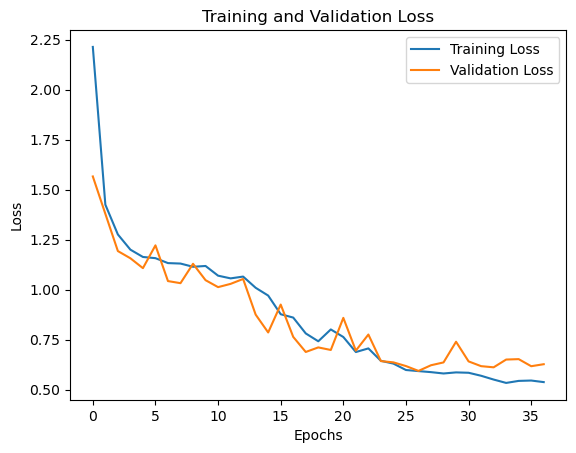

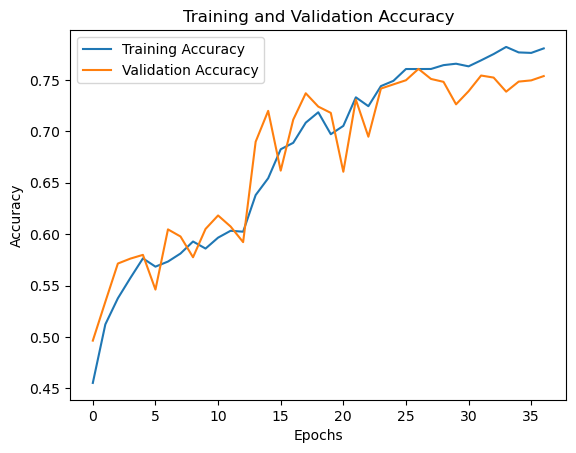

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
# Convert labels to their corresponding indices
labels_test_converted = convert_labels(labels_test)

# Function to evaluate the model in batches
def evaluate_model_in_batches(model, point_clouds_test, labels_test, batch_size=32):
    num_samples = len(point_clouds_test)
    num_batches = int(np.ceil(num_samples / batch_size))  # Number of batches
    total_loss = 0.0
    total_accuracy = 0.0

    for batch_idx in range(num_batches):
        # Get the batch
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_samples)
        batch_point_clouds = point_clouds_test[start_idx:end_idx]
        batch_labels = labels_test[start_idx:end_idx]

        # Evaluate the batch
        batch_loss, batch_accuracy = model.evaluate(batch_point_clouds, batch_labels, verbose=0)

        # Accumulate the total loss and accuracy
        total_loss += batch_loss * len(batch_point_clouds)  # Multiply by the batch size
        total_accuracy += batch_accuracy * len(batch_point_clouds)

    # Calculate the average loss and accuracy over all samples
    average_loss = total_loss / num_samples
    average_accuracy = total_accuracy / num_samples

    return average_loss, average_accuracy

In [23]:
batch_size = 2  
average_loss, average_accuracy = evaluate_model_in_batches(loaded_model, point_clouds_test, labels_test_converted, batch_size=batch_size)

print(f"Average Loss: {average_loss}")
print(f"Average Accuracy: {average_accuracy}")


Average Loss: 0.6306386967500051
Average Accuracy: 0.77159663438797


In [42]:
label_colors = {
    0: 'red',
    11: 'blue',
    12: 'green',
    13: 'orange',
    14: 'purple',
    15: 'cyan',
    16: 'magenta',
    17: 'yellow',
    18: 'brown',
    21: 'lime',
    22: 'navy',
    23: 'teal',
    24: 'violet',
    25: 'salmon',
    26: 'gold',
    27: 'lightblue',
    28: 'coral',
    31: 'olive',
    32: 'silver',
    33: 'gray',
    34: 'black',
    35: 'darkred',
    36: 'darkgreen',
    37: 'darkblue',
    38: 'darkviolet',
    41: 'peru',
    42: 'chocolate',
    43: 'mediumvioletred',
    44: 'lightskyblue',
    45: 'lightpink',
    46: 'plum',
    47: 'khaki',
    48: 'powderblue',
}

# a sample from the test set
sample_idx = 38
point_cloud_sample = point_clouds_test[sample_idx]
true_labels_sample = labels_test[sample_idx]



In [43]:
point_cloud_sample

array([[-0.57055597, -0.1601968 , -0.06835842],
       [-0.16087969, -0.41825282, -0.20182836],
       [-0.49467562,  0.08825079,  0.14224854],
       ...,
       [-0.13109185, -0.42943553, -0.16669425],
       [ 0.48112779, -0.19842731,  0.10277508],
       [ 0.52022024,  0.30006776,  0.08077139]])

In [44]:
print("Shape of point_cloud_sample:", point_cloud_sample.shape)


Shape of point_cloud_sample: (15230, 3)


In [45]:
# Add batch dimension
point_cloud_sample_ex = np.expand_dims(point_cloud_sample, axis=0)  # Shape: (1, num_points, 3)

1/1 [==============================] - 0s 243ms/step


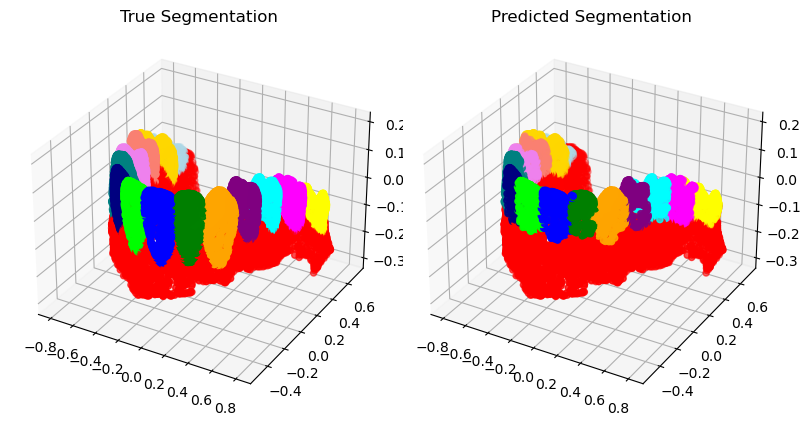

In [46]:
predictions = loaded_model.predict(point_cloud_sample_ex)

predicted_labels = np.argmax(predictions, axis=-1)[0]  # Shape: (num_points,)
predicted_labels = convert_indices(predicted_labels)

# Ensure it's a 1D array
predicted_labels = np.squeeze(predicted_labels)
predicted_labels_sample = predicted_labels

# Map labels to colors
true_colors = np.array([label_colors[label] if label in label_colors else 'gray' for label in true_labels_sample])
predicted_colors = np.array([label_colors[label] if label in label_colors else 'gray' for label in predicted_labels_sample])

# Create a figure for true vs predicted labels
fig = plt.figure(figsize=(8, 8))

# Subplot 1: True labels
ax1 = fig.add_subplot(121, projection='3d')
scatter_true = ax1.scatter(point_cloud_sample[:, 0], point_cloud_sample[:, 1], point_cloud_sample[:, 2], 
                            c=true_colors, marker='o')
ax1.set_title('True Segmentation')

# Subplot 2: Predicted labels
ax2 = fig.add_subplot(122, projection='3d')
scatter_pred = ax2.scatter(point_cloud_sample[:, 0], point_cloud_sample[:, 1], point_cloud_sample[:, 2], 
                            c=predicted_colors, marker='o')
ax2.set_title('Predicted Segmentation')

plt.tight_layout()
plt.show()
